<a href="https://colab.research.google.com/github/katezfire/nba_stats_exploration/blob/main/NBA_Season_Stats_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('1AerWi4si_GBmUTZtoIT3jjtYU0JKvKm3')

     |████████████████████████████████| 71kB 1.9MB/s 


# **NBA Player Season Stats Exploratory Data Analysis**

This Dataset showcases all NBA Players Stats from 1950 to 2017. <br><br>
The reason I picked this data set is because I'm an avid Basketball fan. There's always a debate in the Basketball community on who's the best player of all time so I wanted to use stats to determine the answer.
<br><br>

In this project I will attempt 


In [82]:
project_name = "NBA_Stats" # change this

In [ ]:
!pip install jovian --upgrade -q

In [83]:
import jovian

In [84]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/katelynajefferson/nba-stats


'https://jovian.ml/katelynajefferson/nba-stats'

## Data Preparation and Cleaning



In [ ]:
import jovian

In [ ]:
jovian.commit()

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install pandas --upgrade

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
nba_stats_df = pd.read_csv('gdrive/My Drive/Seasons_Stats.csv')

In [6]:
nba_stats_df

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,0.002,0.442,8.6,17.3,12.9,9.1,1.8,3.0,10.9,15.5,NaN,3.4,2.2,5.6,0.157,NaN,-0.2,2.3,2.1,1.8,253.0,443.0,0.571,0.0,1.0,0.000,253.0,442.0,0.572,0.571,133.0,196.0,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,0.006,0.247,9.2,17.0,13.2,12.2,0.7,3.3,10.2,16.5,NaN,0.5,0.6,1.0,0.094,NaN,-3.2,0.8,-2.5,-0.1,78.0,158.0,0.494,0.0,1.0,0.000,78.0,157.0,0.497,0.494,22.0,39.0,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,0.000,0.161,10.8,24.9,17.6,5.3,0.9,3.7,8.3,14.8,NaN,-0.1,0.1,0.0,-0.005,NaN,-7.8,0.4,-7.3,-0.1,10.0,31.0,0.323,0.0,0.0,NaN,10.0,31.0,0.323,0.323,3.0,5.0,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,0.448,0.181,1.9,14.2,8.0,6.1,0.9,1.5,14.4,14.4,NaN,-0.3,0.8,0.5,0.030,NaN,-3.6,-0.1,-3.7,-0.4,88.0,221.0,0.398,33.0,99.0,0.333,55.0,122.0,0.451,0.473,31.0,40.0,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [7]:
nba_stats_df.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [8]:
#Theses are all the relevant columns for my analysis
selected_columns = [   
                  #Year Played
                  'Year', 
                  #Player Name 
                  'Player', 
                  #Position 
                  'Pos', 
                  #Age
                  'Age', 
                  #Team
                  'Tm', 
                  #Games
                  'G', 
                  #Games Started
                  'GS', 
                  #Miniutes Played
                  'MP',
                  #Player Efficiency Rating
                  'PER', 
                  #True Shooting Percentage
                  'TS%', 
                  #3 Point attempt Rate
                  '3PAr', 
                  #Free throw attempt Rate
                  'FTr', 
                  #Offensive ReboundPercentage(Starts 1973-74 season)
                  'ORB%',
                  #Defensive Rebound Percentage(Starts 1970-71 season)
                  'DRB%',
                  #Total Rebounds Percentage(Starts 1970-71 season)
                  'TRB%', 
                  #Assists Percentage(Starts 1964-65 season)
                  'AST%', 
                  #Steals Percentage(Starts 1973-74 season)
                  'STL%',
                  #Blocks Percentage(Starts 1973-74 season)
                  'BLK%',
                  #Turnover Percentage(Starts 1977-78 season)
                  'TOV%', 
                  #Usage Percentage(Starts 1977-78 season)
                  'USG%',  
                  #Box Plus Minus 
                  'BPM', 
                  #Value Over Replacement Player
                  'VORP',
                  #Field Goal 
                  'FG', 
                  #Field Goal Attempts
                  'FGA', 
                  #Field Goal Percentage
                  'FG%', 
                  #3-Point Field Goal
                  '3P', 
                  #3 Point Field Goal Attempts
                  '3PA',
                  #3-Point Field Goal Percentage
                  '3P%',
                  #2-Point Field Goals
                  '2P', 
                  #2-Point Field Goal Attempts
                  '2PA', 
                  #2-Point Field Goal Percentage
                  '2P%', 
                  #Effective Field Goal Percentage 
                  'eFG%', 
                  #Free Throws
                  'FT', 
                  #Free Throw Attempts
                  'FTA', 
                  #Free Throw Percentage
                  'FT%', 
                  #Offensive Rebounds
                  'ORB', 
                  #Defensive Rebounds
                  'DRB', 
                  #Total Rebounds
                  'TRB',
                  #Assists
                  'AST', 
                  #Steals
                  'STL', 
                  #Blocks
                  'BLK', 
                  #Turn overs
                  'TOV', 
                  #Personal Fouls
                  'PF', 
                  #Points
                  'PTS'

]

In [9]:
len(selected_columns)

44

In [10]:
nba_stats_df.drop(['blanl','blank2','Unnamed: 0','DWS',
                   'OWS','WS','WS/48','OBPM','DBPM', 'VORP','FG','FGA'
                   ], axis=1, inplace=True)

I decided to drop these columns because I knew I wouldn't use these stats when performing my exploratory analysis.

In [11]:
nba_stats_df.shape

(24691, 41)

In [19]:
nba_stats_df

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,BPM,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,0.0,0.0,0.0,0.368,0.000,0.467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.279,0.0,0.0,0.000,144.0,516.0,0.279,0.279,170.0,241.0,0.705,0.0,0.0,0.0,176.0,0.0,0.0,0.0,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,0.0,0.0,0.0,0.435,0.000,0.387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.372,0.0,0.0,0.000,102.0,274.0,0.372,0.372,75.0,106.0,0.708,0.0,0.0,0.0,109.0,0.0,0.0,0.0,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,0.0,0.0,0.0,0.394,0.000,0.259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.349,0.0,0.0,0.000,174.0,499.0,0.349,0.349,90.0,129.0,0.698,0.0,0.0,0.0,140.0,0.0,0.0,0.0,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,0.0,0.0,0.0,0.312,0.000,0.395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256,0.0,0.0,0.000,22.0,86.0,0.256,0.256,19.0,34.0,0.559,0.0,0.0,0.0,20.0,0.0,0.0,0.0,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,0.0,0.0,0.0,0.308,0.000,0.378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.256,0.0,0.0,0.000,21.0,82.0,0.256,0.256,17.0,31.0,0.548,0.0,0.0,0.0,20.0,0.0,0.0,0.0,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,0.002,0.442,8.6,17.3,12.9,9.1,1.8,3.0,10.9,15.5,2.1,0.571,0.0,1.0,0.000,253.0,442.0,0.572,0.571,133.0,196.0,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,0.006,0.247,9.2,17.0,13.2,12.2,0.7,3.3,10.2,16.5,-2.5,0.494,0.0,1.0,0.000,78.0,157.0,0.497,0.494,22.0,39.0,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,0.000,0.161,10.8,24.9,17.6,5.3,0.9,3.7,8.3,14.8,-7.3,0.323,0.0,0.0,0.000,10.0,31.0,0.323,0.323,3.0,5.0,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,0.448,0.181,1.9,14.2,8.0,6.1,0.9,1.5,14.4,14.4,-3.7,0.398,33.0,99.0,0.333,55.0,122.0,0.451,0.473,31.0,40.0,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [20]:
nba_stats_df.isna() 

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,BPM,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
24687,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
24688,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
24689,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
nba_stats_df = nba_stats_df.replace(np.nan, 0)

The code above to handle all in the NaN values in the data set. Since my data set is full of numbers I decided to replace every NaN value with zero to show the player did not record any numbers in that stat.

In [22]:
nba_stats_df.sample(10)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,BPM,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1239,1958.0,Ernie Beck,SG,26.0,PHW,71.0,0.0,1974.0,12.7,0.462,0.000,0.297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.398,0.0,0.0,0.000,272.0,683.0,0.398,0.398,170.0,203.0,0.837,0.0,0.0,307.0,190.0,0.0,0.0,0.0,173.0,714.0
18342,2007.0,Ike Diogu,PF,23.0,IND,42.0,2.0,538.0,13.5,0.539,0.000,0.525,11.4,18.8,15.0,6.5,0.5,2.1,17.9,22.8,-4.9,0.454,0.0,0.0,0.000,83.0,183.0,0.454,0.454,77.0,96.0,0.802,54.0,86.0,140.0,20.0,5.0,15.0,49.0,87.0,243.0
17400,2005.0,Donyell Marshall,PF,31.0,TOR,65.0,2.0,1645.0,19.9,0.591,0.613,0.154,6.4,23.3,14.7,8.4,1.8,2.0,6.2,18.7,3.9,0.443,151.0,363.0,0.416,111.0,229.0,0.485,0.570,72.0,91.0,0.791,95.0,333.0,428.0,81.0,57.0,46.0,42.0,136.0,747.0
1107,1956.0,Dolph Schayes*,PF,27.0,SYR,72.0,0.0,2517.0,23.7,0.497,0.000,0.526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.387,0.0,0.0,0.000,465.0,1202.0,0.387,0.387,542.0,632.0,0.858,0.0,0.0,891.0,200.0,0.0,0.0,0.0,251.0,1472.0
9888,1990.0,Brian Rowsom,PF,24.0,CHH,44.0,2.0,559.0,13.6,0.522,0.011,0.464,8.4,18.8,13.3,5.7,1.6,1.2,10.4,18.3,-3.1,0.436,1.0,2.0,0.500,77.0,177.0,0.435,0.439,68.0,83.0,0.819,44.0,87.0,131.0,22.0,18.0,11.0,25.0,58.0,225.0
20984,2011.0,Jason Richardson,SG,30.0,ORL,55.0,55.0,1919.0,13.2,0.543,0.496,0.130,2.1,11.0,6.7,9.7,1.8,0.4,8.4,18.6,2.5,0.433,127.0,331.0,0.384,162.0,336.0,0.482,0.528,61.0,87.0,0.701,34.0,186.0,220.0,111.0,66.0,10.0,65.0,116.0,766.0
5774,1980.0,Marty Byrnes,SF,23.0,LAL,32.0,0.0,194.0,6.3,0.557,0.000,0.300,5.5,9.3,7.6,7.9,1.2,0.3,28.0,16.2,-6.0,0.500,0.0,0.0,0.000,25.0,50.0,0.500,0.500,13.0,15.0,0.867,9.0,18.0,27.0,13.0,5.0,1.0,22.0,32.0,63.0
5641,1979.0,Dave Robisch,C,29.0,LAL,80.0,0.0,1219.0,11.9,0.499,0.000,0.342,7.7,17.1,12.7,9.4,0.7,1.0,12.1,14.4,-2.0,0.446,0.0,0.0,0.000,150.0,336.0,0.446,0.446,86.0,115.0,0.748,82.0,203.0,285.0,97.0,20.0,25.0,53.0,108.0,386.0
10680,1992.0,Larry Krystkowiak,PF,27.0,MIL,79.0,16.0,1848.0,11.4,0.486,0.008,0.256,7.8,19.2,13.3,9.1,1.5,0.4,13.5,19.3,-3.3,0.444,0.0,5.0,0.000,293.0,655.0,0.447,0.444,128.0,169.0,0.757,131.0,298.0,429.0,114.0,54.0,12.0,115.0,218.0,714.0
13788,1998.0,Shawn Respert,SG,25.0,DAL,10.0,0.0,215.0,10.3,0.471,0.310,0.083,3.5,10.6,7.0,14.2,1.2,0.0,14.7,21.7,-5.6,0.429,6.0,26.0,0.231,30.0,58.0,0.517,0.464,4.0,7.0,0.571,7.0,20.0,27.0,17.0,5.0,0.0,15.0,17.0,82.0


Before I start my exploratory analysis and visualization I want to make sure each column has the correct data type. 

In [23]:
nba_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    24691 non-null  float64
 1   Player  24691 non-null  object 
 2   Pos     24691 non-null  object 
 3   Age     24691 non-null  float64
 4   Tm      24691 non-null  object 
 5   G       24691 non-null  float64
 6   GS      24691 non-null  float64
 7   MP      24691 non-null  float64
 8   PER     24691 non-null  float64
 9   TS%     24691 non-null  float64
 10  3PAr    24691 non-null  float64
 11  FTr     24691 non-null  float64
 12  ORB%    24691 non-null  float64
 13  DRB%    24691 non-null  float64
 14  TRB%    24691 non-null  float64
 15  AST%    24691 non-null  float64
 16  STL%    24691 non-null  float64
 17  BLK%    24691 non-null  float64
 18  TOV%    24691 non-null  float64
 19  USG%    24691 non-null  float64
 20  BPM     24691 non-null  float64
 21  FG%     24691 non-null  float64
 22

## Exploratory Analysis and Visualization

Here I will explore different stats in the data set that interest me to help me formulate questions I would like to answer in the next section of my code.

In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


#**Points**#

In [25]:
top_points = nba_stats_df.sort_values('PTS',ascending=False).head(45).drop_duplicates(subset=['Player'])
top_points

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,BPM,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1706,1962.0,Wilt Chamberlain*,C,25.0,PHW,80.0,0.0,3882.0,31.7,0.536,0.000,0.431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.506,0.0,0.0,0.000,1597.0,3159.0,0.506,0.506,835.0,1363.0,0.613,0.0,0.0,2052.0,192.0,0.0,0.0,0.0,123.0,4029.0
8469,1987.0,Michael Jordan*,SG,23.0,CHI,82.0,82.0,3281.0,29.8,0.562,0.029,0.427,5.6,9.3,7.4,22.2,3.6,2.3,9.1,38.3,8.6,0.482,12.0,66.0,0.182,1086.0,2213.0,0.491,0.484,833.0,972.0,0.857,166.0,264.0,430.0,377.0,236.0,125.0,272.0,237.0,3041.0
17742,2006.0,Kobe Bryant,SG,27.0,LAL,80.0,80.0,3277.0,28.0,0.559,0.238,0.377,2.6,12.7,7.6,24.1,2.4,0.7,9.0,38.7,5.8,0.450,180.0,518.0,0.347,798.0,1655.0,0.482,0.491,696.0,819.0,0.850,71.0,354.0,425.0,360.0,147.0,30.0,250.0,233.0,2832.0
4255,1975.0,Bob McAdoo*,C,23.0,BUF,82.0,0.0,3539.0,25.8,0.569,0.000,0.372,9.2,23.5,16.6,8.6,1.2,2.4,0.0,0.0,4.7,0.512,0.0,0.0,0.000,1095.0,2138.0,0.512,0.512,641.0,796.0,0.805,307.0,848.0,1155.0,179.0,92.0,174.0,0.0,278.0,2831.0
3316,1972.0,Kareem Abdul-Jabbar*,C,24.0,MIL,81.0,0.0,3583.0,29.9,0.603,0.000,0.363,0.0,0.0,18.1,16.1,0.0,0.0,0.0,0.0,0.0,0.574,0.0,0.0,0.000,1159.0,2019.0,0.574,0.574,504.0,732.0,0.689,0.0,0.0,1346.0,370.0,0.0,0.0,0.0,235.0,2822.0
2355,1967.0,Rick Barry*,SF,22.0,SFW,78.0,0.0,3175.0,24.2,0.531,0.000,0.380,0.0,0.0,0.0,13.6,0.0,0.0,0.0,0.0,0.0,0.451,0.0,0.0,0.000,1011.0,2240.0,0.451,0.451,753.0,852.0,0.884,0.0,0.0,714.0,282.0,0.0,0.0,0.0,258.0,2775.0
1812,1963.0,Elgin Baylor*,SF,28.0,LAL,80.0,0.0,3370.0,26.6,0.519,0.000,0.348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.453,0.0,0.0,0.000,1029.0,2273.0,0.453,0.453,661.0,790.0,0.837,0.0,0.0,1146.0,386.0,0.0,0.0,0.0,226.0,2719.0
3588,1973.0,Tiny Archibald*,PG,24.0,KCO,80.0,0.0,3681.0,25.2,0.555,0.000,0.372,0.0,0.0,3.2,38.9,0.0,0.0,0.0,0.0,0.0,0.488,0.0,0.0,0.000,1028.0,2106.0,0.488,0.488,663.0,783.0,0.847,0.0,0.0,223.0,910.0,0.0,0.0,0.0,207.0,2719.0
22438,2014.0,Kevin Durant,SF,25.0,OKC,81.0,81.0,3122.0,29.8,0.635,0.291,0.477,2.2,18.6,10.8,26.7,1.7,1.5,12.2,33.0,8.8,0.503,192.0,491.0,0.391,657.0,1197.0,0.549,0.560,703.0,805.0,0.873,58.0,540.0,598.0,445.0,103.0,59.0,285.0,174.0,2593.0
5848,1980.0,George Gervin*,SG,27.0,SAS,78.0,0.0,2934.0,24.0,0.587,0.053,0.306,5.7,8.9,7.3,11.0,1.6,1.4,10.3,31.7,2.2,0.528,32.0,102.0,0.314,992.0,1838.0,0.540,0.536,505.0,593.0,0.852,154.0,249.0,403.0,202.0,110.0,79.0,254.0,208.0,2585.0


The first thing I would like to figure out is which players have the top points in the entire data set. To get the Top 20 players I had to select from a 45 players because there were many duplicates.

In [26]:
top_points[['Player','PTS']]

,Player,PTS
1706,Wilt Chamberlain*,4029.0
8469,Michael Jordan*,3041.0
17742,Kobe Bryant,2832.0
4255,Bob McAdoo*,2831.0
3316,Kareem Abdul-Jabbar*,2822.0
2355,Rick Barry*,2775.0
1812,Elgin Baylor*,2719.0
3588,Tiny Archibald*,2719.0
22438,Kevin Durant,2593.0
5848,George Gervin*,2585.0


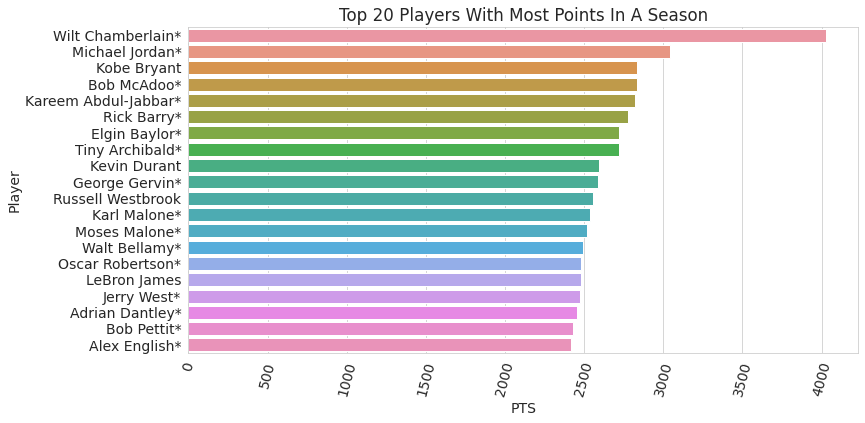

In [27]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plt.title('Top 20 Players With Most Points In A Season')
plt.xticks(rotation=75)
x= top_points['PTS']
y= top_points['Player']
sns.barplot(x=x,y=y,data=top_points);

In [28]:
min_top_points = top_points['PTS'].min()

In [29]:
min_top_points

2414.0

In [30]:
top_points_avg = top_points['PTS'].sum()

In [31]:
top_points_avg

53793.0

Wilt Chamberlain is clearly the winner for most points scored in a season way above the other 19 players. Some things that should be considered when comparing his points to other players that may not have played in his time is that the game evolved over time. During Wilt Chamberlain's time there was no 3-point line, the game was a bit faster back then as well. Another thing to take in consideration is the player's size. The bigger you are the less likely you are to get blocked.

#**Top Scorers Ages**

In [32]:
top_scorers_ages = top_points[['Player','Age']]
top_scorers_ages

,Player,Age
1706,Wilt Chamberlain*,25.0
8469,Michael Jordan*,23.0
17742,Kobe Bryant,27.0
4255,Bob McAdoo*,23.0
3316,Kareem Abdul-Jabbar*,24.0
2355,Rick Barry*,22.0
1812,Elgin Baylor*,28.0
3588,Tiny Archibald*,24.0
22438,Kevin Durant,25.0
5848,George Gervin*,27.0


In [33]:
top_scorers_ages['Age'].mean()

25.45

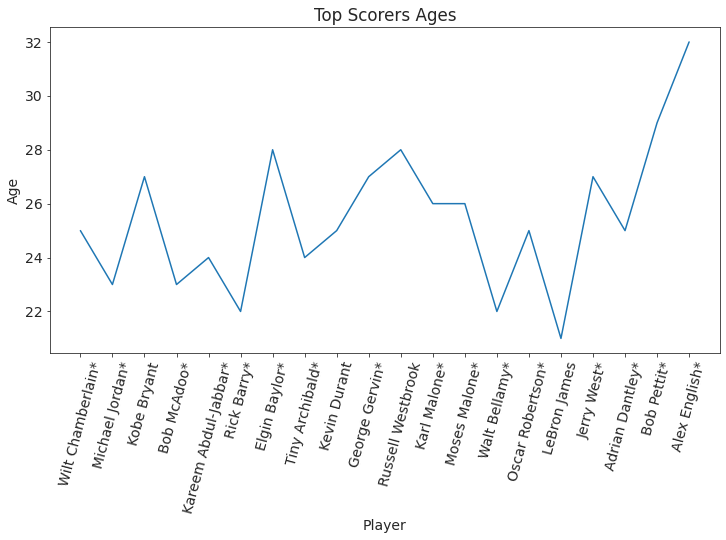

In [34]:
sns.set_style('ticks')
plt.figure(figsize=(12,6))
plt.title('Top Scorers Ages')
plt.xticks(rotation=75)
x= top_scorers_ages['Player']
y= top_scorers_ages['Age']
sns.lineplot(x=x,y=y,data=top_scorers_ages);

When each of these players had the most points in their season it seems like the majority were already established players entering their prime.

#**Minutes Played**

In [35]:
min_played = nba_stats_df.sort_values('MP',ascending=False).head(50).drop_duplicates(subset=['Player'])

In [36]:
min_played[['Player','MP']]

,Player,MP
1706,Wilt Chamberlain*,3882.0
3401,John Havlicek*,3698.0
2739,Elvin Hayes*,3695.0
3588,Tiny Archibald*,3681.0
5284,Truck Robinson,3638.0
2583,Jerry Lucas*,3619.0
3316,Kareem Abdul-Jabbar*,3583.0
2045,Oscar Robertson*,3559.0
4255,Bob McAdoo*,3539.0
11773,Latrell Sprewell,3533.0


In [37]:
min_played['MP'].median()

3516.5

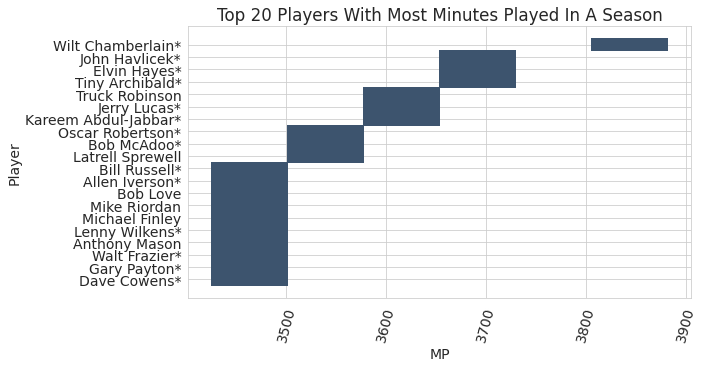

In [73]:
sns.set_style('whitegrid')
plt.title('Top 20 Players With Most Minutes Played In A Season')
plt.xticks(rotation=75)
x= min_played['MP']
y= min_played['Player']
sns.histplot(x=x,y=y,data=min_played);

When we look at the Most Minutes Played in a Season and compare it to top scores we see only 4 of the top scores played the most minutes. A key note is that all of these players are not players that play currently there was probably less load management back then.

#**Most Assists**



In [75]:
top_assists = nba_stats_df.sort_values('AST',ascending=False).head(54).drop_duplicates(subset=['Player'])

In [76]:
top_assists[['Player','AST','MP']]

,Player,AST,MP
10377,John Stockton*,1164.0,3103.0
7857,Isiah Thomas*,1123.0,3089.0
5621,Kevin Porter,1099.0,3064.0
9282,Kevin Johnson,991.0,3179.0
10208,Magic Johnson*,989.0,2933.0
13081,Mark Jackson,935.0,3054.0
19164,Chris Paul,925.0,3006.0
7431,Norm Nixon,914.0,3053.0
3588,Tiny Archibald*,910.0,3681.0
2445,Guy Rodgers*,908.0,3063.0


In [41]:
len(top_assists)

21

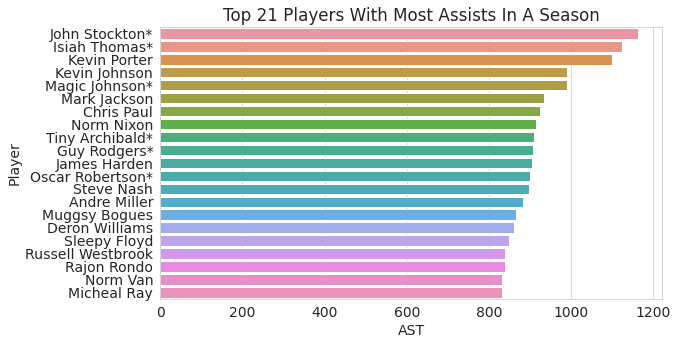

In [80]:
sns.set_style('whitegrid')
plt.title('Top 21 Players With Most Assists In A Season')
x= top_assists['AST']
y= top_assists['Player']
sns.barplot(x=x,y=y,data=top_assists);

In [43]:
top_assists['AST'].sum()

19463.0

In [44]:
top_assists['AST'].mean()

926.8095238095239

Something interesting about this filter is that most of the players in this list are point guards. This is somewhat expected because they make plays for their teammates and have the ball majority of the time.

#**Top Turnover Percentages**

In [45]:
most_turnovers = nba_stats_df.sort_values('TOV',ascending=False).head(27).drop_duplicates(subset=['Player'])

In [46]:
most_turnovers[['Year','Player','TOV']]

,Year,Player,TOV
24306,2017.0,James Harden,464.0
24654,2017.0,Russell Westbrook,438.0
5137,1978.0,Artis Gilmore*,366.0
5270,1978.0,Kevin Porter,360.0
6002,1980.0,Micheal Ray,359.0
5325,1978.0,Ricky Sobers,352.0
7936,1986.0,Charles Barkley*,350.0
6042,1980.0,Reggie Theus,348.0
5223,1978.0,Bob McAdoo*,346.0
5589,1979.0,George McGinnis,346.0


In [47]:
most_turnovers['TOV'].median()

345.5

In [48]:
most_turnovers['TOV'].sum()

7078.0

In [49]:
p_name = most_turnovers['Player']

In [50]:
m_turn = most_turnovers['TOV']

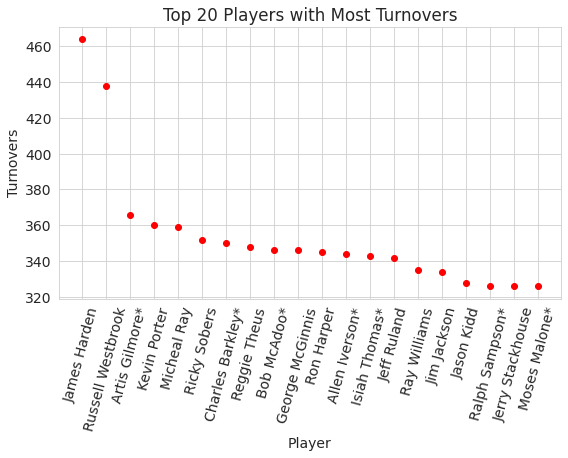

In [51]:
sns.set_style('whitegrid')
plt.title('Top 20 Players with Most Turnovers')
plt.plot(p_name,m_turn,'or')
plt.xticks(rotation=75)
plt.xlabel('Player')
plt.ylabel('Turnovers');

When looking at this filer it seems again to be guards on this list like the last filter. Something else to note is that the top two players with the most turnovers are from the same year 2017. They were the stars and guards on their teams in that year handling the ball for the most for their teams.


## Asking and Answering Questions



In this section I will start to ask questions that arrived during my data exploration.

**Q:What years have the most total points scored?**

In [52]:
most_points_year_df = nba_stats_df.groupby('Year')[['PTS']].sum().sort_values('PTS', ascending=False).head(20)

In [53]:
most_points_year_df

,PTS
Year,
2017.0,282466.0
2011.0,281221.0
2015.0,278672.0
2009.0,272519.0
2010.0,270750.0
2014.0,269984.0
2016.0,269138.0
2008.0,267460.0
2005.0,264712.0


In [54]:
year = ['2017','2011','2015','2009','2010','2014','2016','2008','2005','1996','2006','2013','2007','1990','1997','2004','1998','1991','2001','2002']
points = most_points_year_df['PTS']

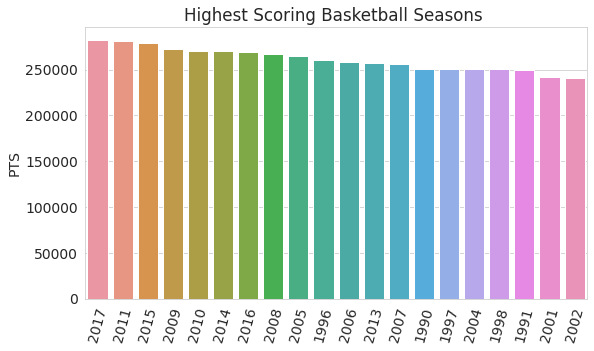

In [55]:
sns.set_style('whitegrid')
plt.title('Highest Scoring Basketball Seasons ')
plt.xticks(rotation=75)
x= year
y= points
sns.barplot(x=x,y=y,data = most_points_year_df);

Majority of the highest scoring years are in the 2000's the highest being 2017 which isn't much larger the points increased by 1,245 from 2011 to 2017.

**Q:Which Players played the highest Box Plus/Minus and Player Effiency Rating?**

In [56]:
bpm_df = nba_stats_df.sort_values('BPM',ascending=False)[['Player','BPM','MP']].head(10)
bpm_df

,Player,BPM,MP
12883,Bruce Bowen,36.2,1.0
11855,Darrell Armstrong,34.8,8.0
22919,Sim Bhullar,26.6,3.0
22600,DeAndre Liggins,24.8,1.0
17164,Jackie Butler,21.5,5.0
14074,Ben Davis,21.0,21.0
14439,Tyson Wheeler,19.6,3.0
18952,Gerald Green,17.7,4.0
11538,Geert Hammink,17.0,3.0
12554,Cedric Lewis,16.5,4.0


In [57]:
per_df = nba_stats_df.sort_values('PER',ascending=False)[['Player','PER','MP']].head(10)
per_df

,Player,PER,MP
22600,DeAndre Liggins,129.1,1.0
17164,Jackie Butler,90.3,5.0
19581,Steven Hill,88.3,2.0
2422,George Lee,77.0,5.0
18952,Gerald Green,76.3,4.0
10244,Ian Lockhart,76.3,2.0
14439,Tyson Wheeler,76.1,3.0
11194,Alan Ogg,67.9,3.0
3020,Dave Scholz,67.6,1.0
11510,Chad Gallagher,66.8,3.0


In [58]:
p_name = bpm_df['Player']
bpm_c = bpm_df['BPM']
pname_2 = per_df['Player']
per = per_df['PER']

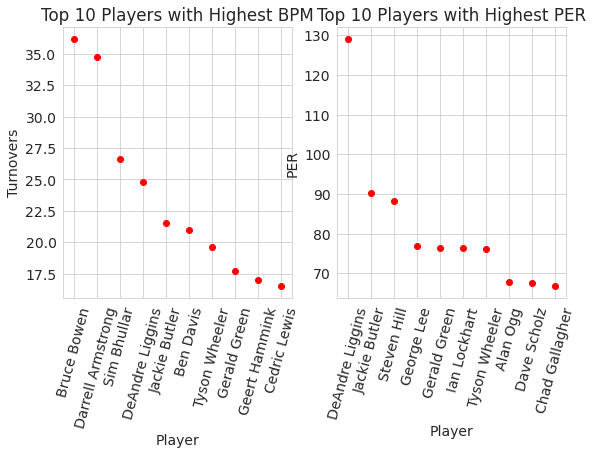

In [59]:
sns.set_style('whitegrid')

plt.subplot(1, 2, 1)
plt.title('Top 10 Players with Highest BPM')
plt.plot(p_name,bpm_c,'or')
plt.xticks(rotation=75)
plt.xlabel('Player')
plt.ylabel('Turnovers');

plt.subplot(1, 2, 2)
sns.set_style('whitegrid')
plt.title('Top 10 Players with Highest PER')
plt.plot(pname_2,per,'or')
plt.xticks(rotation=75)
plt.xlabel('Player')
plt.ylabel('PER');

Seems the players with the highest BPM and PER did not play a lot of minutes so the less shots one takes and make the higher their stats will me.

**Q: What players have the top 3PT% and FT%?**

In [60]:
over_60_df = nba_stats_df.GS > 60

In [61]:
top_per_df = nba_stats_df[over_60_df].head(40)

In [62]:
top_per_df = nba_stats_df[over_60_df].sort_values('3P%', ascending=False).head(40)

In [63]:
top_per_df = nba_stats_df[over_60_df].sort_values('FT%', ascending=False).head(40)

In [64]:
top_per_df[['Year','Player','3P%','FT%']].head(30)

,Year,Player,3P%,FT%
19434,2009.0,Jose Calderon,0.406,0.981
11359,1994.0,Mahmoud Abdul-Rauf,0.316,0.956
19350,2009.0,Ray Allen,0.409,0.952
14675,2000.0,Jeff Hornacek,0.478,0.950
11223,1993.0,Mark Price,0.416,0.948
10776,1992.0,Mark Price,0.387,0.947
13730,1998.0,Chris Mullin*,0.440,0.939
20323,2010.0,Steve Nash,0.426,0.938
10911,1993.0,Mahmoud Abdul-Rauf,0.355,0.935
12256,1995.0,Spud Webb,0.331,0.934


In [65]:
p_name = top_per_df['Player']
three_point = top_per_df['3P%']
free_throw = top_per_df['FT%']

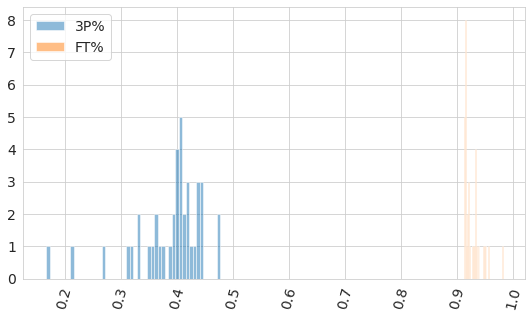

In [66]:
plt.hist(three_point, bins=50, label = '3P%', alpha=0.5)
plt.hist(free_throw, bins=50, label = 'FT%', alpha=0.5)
plt.legend(loc='upper left')
plt.xticks(rotation=75)
plt.show();

Jose Calderon has the best 3pt% in this filer and Jeff Hornacek has the pest FT% in this filter. Reggie Miller is on this list twice having top percentages in two seprate years.

**Q: What players played on the most teams?**

In [67]:
most_teams_df = nba_stats_df.groupby('Player')[['Tm']].nunique()

In [68]:
 most_teams_df.sort_values('Tm',ascending=False).head(20)

,Tm
Player,
Tony Massenburg,14
George Johnson,14
Jim Jackson,13
Chucky Brown,13
Kevin Ollie,13
Joe Smith,13
Lou Amundson,12
Mike James,12
Reggie Williams,11


As we can see from the data Tony Massenburg and George Johnson both played on 14 teams. Another interesting thing is that there are multiple players who played on the same ammount of teams.

**Q: Which Player has the most Offensive and Defensive rebounds**

In [69]:
most_rb = nba_stats_df.sort_values('TRB',ascending=False).head(50).drop_duplicates(subset=['Player'])

In [70]:
most_rb 

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,BPM,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1593,1961.0,Wilt Chamberlain*,C,24.0,PHW,79.0,0.0,3773.0,27.8,0.519,0.000,0.429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.509,0.0,0.0,0.000,1251.0,2457.0,0.509,0.509,531.0,1054.0,0.504,0.0,0.0,2149.0,148.0,0.0,0.0,0.0,130.0,3033.0
2049,1964.0,Bill Russell*,C,29.0,BOS,78.0,0.0,3482.0,19.3,0.461,0.000,0.398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.433,0.0,0.0,0.000,466.0,1077.0,0.433,0.433,236.0,429.0,0.550,0.0,0.0,1930.0,370.0,0.0,0.0,0.0,190.0,1168.0
2288,1966.0,Jerry Lucas*,PF,25.0,CIN,79.0,0.0,3517.0,18.8,0.499,0.000,0.265,0.0,0.0,0.0,8.2,0.0,0.0,0.0,0.0,0.0,0.453,0.0,0.0,0.000,690.0,1523.0,0.453,0.453,317.0,403.0,0.787,0.0,0.0,1668.0,213.0,0.0,0.0,0.0,274.0,1697.0
1655,1961.0,Bob Pettit*,PF,28.0,STL,76.0,0.0,3027.0,25.2,0.511,0.000,0.467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.447,0.0,0.0,0.000,769.0,1720.0,0.447,0.447,582.0,804.0,0.724,0.0,0.0,1540.0,262.0,0.0,0.0,0.0,217.0,2120.0
10801,1992.0,Dennis Rodman*,PF,30.0,DET,82.0,80.0,3301.0,17.0,0.574,0.159,0.220,18.1,34.1,26.2,8.2,1.1,1.3,16.7,11.1,4.9,0.539,32.0,101.0,0.317,310.0,534.0,0.581,0.564,84.0,140.0,0.600,523.0,1007.0,1530.0,191.0,68.0,70.0,140.0,248.0,800.0
1687,1962.0,Walt Bellamy*,C,22.0,CHP,79.0,0.0,3344.0,26.3,0.554,0.000,0.455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.519,0.0,0.0,0.000,973.0,1875.0,0.519,0.519,549.0,853.0,0.644,0.0,0.0,1500.0,210.0,0.0,0.0,0.0,281.0,2495.0
2841,1969.0,Wes Unseld*,C,22.0,BAL,82.0,0.0,2970.0,18.1,0.515,0.000,0.511,0.0,0.0,0.0,8.8,0.0,0.0,0.0,0.0,0.0,0.476,0.0,0.0,0.000,427.0,897.0,0.476,0.476,277.0,458.0,0.605,0.0,0.0,1491.0,213.0,0.0,0.0,0.0,276.0,1131.0
3942,1974.0,Elvin Hayes*,PF,28.0,CAP,81.0,0.0,3602.0,18.2,0.470,0.000,0.304,9.2,29.7,19.3,6.6,1.1,3.4,0.0,0.0,1.2,0.423,0.0,0.0,0.000,689.0,1627.0,0.423,0.423,357.0,495.0,0.721,354.0,1109.0,1463.0,163.0,86.0,240.0,0.0,252.0,1735.0
1582,1961.0,Elgin Baylor*,SF,26.0,LAL,73.0,0.0,3133.0,28.2,0.498,0.000,0.398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.430,0.0,0.0,0.000,931.0,2166.0,0.430,0.430,676.0,863.0,0.783,0.0,0.0,1447.0,371.0,0.0,0.0,0.0,279.0,2538.0
5580,1979.0,Moses Malone*,C,23.0,HOU,82.0,0.0,3390.0,23.7,0.604,0.000,0.612,19.2,27.1,23.2,5.9,1.1,1.8,16.2,23.4,4.0,0.540,0.0,0.0,0.000,716.0,1325.0,0.540,0.540,599.0,811.0,0.739,587.0,857.0,1444.0,147.0,79.0,119.0,326.0,223.0,2031.0


In [71]:
most_rb[['Player','TRB']]

,Player,TRB
1593,Wilt Chamberlain*,2149.0
2049,Bill Russell*,1930.0
2288,Jerry Lucas*,1668.0
1655,Bob Pettit*,1540.0
10801,Dennis Rodman*,1530.0
1687,Walt Bellamy*,1500.0
2841,Wes Unseld*,1491.0
3942,Elvin Hayes*,1463.0
1582,Elgin Baylor*,1447.0
5580,Moses Malone*,1444.0


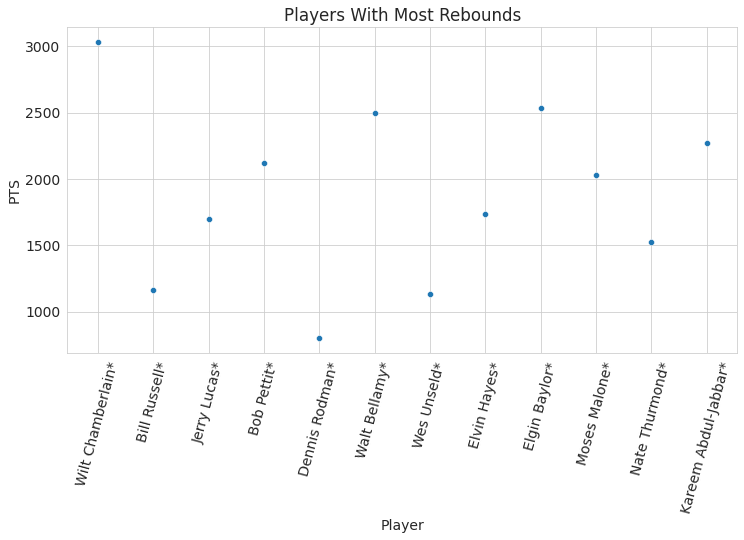

In [72]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plt.title('Players With Most Rebounds')
plt.xticks(rotation=75)
x= most_rb['Player']
y= most_rb['PTS']
sns.scatterplot(x=x,y=y,data=most_rb);


## Inferences and Conclusion



We've drawn many interesting inferences from the survey, here's a summary of the few of them:

- Based on the stats we can infer that the years that had the most points scored are usually modern day teams because that is when the rules allowed more ways for points to be scored with the the 3pt line and more fouls being called.

- We can infer that the Players who played on the most teams were likely traded around alot and were not star players because usually star players do not move around alot.

- Players with the Best BPM and Player Efficiency Ratings usually are players who play less because the less you play the better your stats will when you're on the floor. We also have to take in consideration the games they played in, maybe they came in when the team was already winning the game.

- The players with the most rebounds are usually taller players mostly Centers and Power Forwards.

- Players with the best 3P% and FT% are usually guards and when you're a good 3PT shooter you're usually good with shooting free throws.

## References and Future Work



There's a wealth of information to be discovered using the survey, and we've barely scratched the surface. Here are some ideas for further exploration:

<ul>
<li>Repeat the analysis for different age groups and compare the results</li>
<li>Choose a set of teams to analyze</li>
<li>Compare players points from each year

</ul>

**References:** <br>
Dataset: https://www.kaggle.com/drgilermo/nba-players-stats <br>
Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html <br>
Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html <br>
Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html